#Taller 9 - Ecuaciones en Derivadas Parciales
*Métodos Computacionales - Laboratorio*

14-Jul-2015 & 15-Jul-2015

## Ecuación de Onda con Amortiguamiento 8 ✵

1) ✵✵✵ Modifique la solución de la ecuación de onda 2D por diferencias finitas para incluir efectos de amortiguamiento. Determine la ecuación de evolución modificada y escriba el desarrollo algebraico correspondiente.

$$\frac{\partial^2 \psi}{\partial{x}^2} + 2\eta \frac{\partial\psi}{\partial{t}} = \frac{1}{v^2}\frac{\partial^2 \psi}{\partial{t}^2}$$
    
2) ✵ Programe lo anterior y haga una animación de lo que le acontece a una deformación inicial similar a la que hemos utilizado en anteriores ocasiones. Considere una membrana con extremos fijos.

3) ✵✵✵✵ Ahora haga una animación que simule gotas sobre la superficie de una piscina de agua. Extremos fijos. [Aquí](https://github.com/ComputoCienciasUniandes/MetodosComputacionalesLaboratorio/raw/master/2015-V/actividades/talleres/Taller9/pool.mp4) se muestra un ejemplo del resultado esperado donde se usaron los siguientes parámetros:

    # unidades arbitrarias
    xmin=-0.5
    xmax=0.5
    ymin=-0.5
    ymax=0.5
    dt=1.5e-5
    dx=1.0e-2
    v=400.
    eta=1000.
    r=v*dt/dx

  **Al terminar la clase del miércoles ejecute `lottery.sh` para saber si su taller va a ser revisado.**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

La ecuación de onda en 2D con amoriguamiento es:

$$
\large
\frac{\partial^2\psi}{\partial x^2} + \frac{\partial^2\psi}{\partial y^2} + 2\eta\frac{\partial \psi}{\partial t} = \frac{1}{v^2} \frac{\partial^2\psi}{\partial t^2}   
$$

Identificando $x \rightarrow i, y \rightarrow j$ y $t \rightarrow k$ y aproximando por diferencias finitas tenemos que:

$$
\large
\frac{\psi_{i+1,j,k} + \psi_{i-1,j,k} -2\psi_{i,j,k}}{\Delta x^2} + \frac{\psi_{i,j+1,k} + \psi_{i,j-1,k} -2\psi_{i,j,k}}{\Delta y^2} + 2\eta\frac{\psi_{i,j,k+1} - \psi_{i,j,k-1}}{\Delta t} = \frac{1}{v^2}\frac{\psi_{i,j,k+1} + \psi_{i,j,k-1} -2\psi_{i,j,k}}{\Delta t^2}
$$

Despejando para $\psi(i,j,k+1)$ y definiendo $\Delta x = \Delta y = h_{1}, \Delta t = h_{2}$obtenemos:

$$
\large
\psi_{i,j,k+1} = \frac{1}{\frac{1}{v^2h_{2}^2} - \frac{2\eta}{h_{2}}}\left[ \frac{\psi_{i+1,j,k} + \psi_{i-1,j,k} + \psi_{i,j+1,k} + \psi_{i,j-1,k}}{h_{1}^2} + 2\left(\frac{1}{v^2h_{2}^2} - \frac{2}{h_{1}^2}\right)\psi_{i,j,k} - \left(\frac{2\eta}{h_{2}} + \frac{1}{v^2h_{2}^2}\right)\psi_{i,j,k-1} \right]
$$

In [26]:
Nt = 2000
Nl = 50
L = 10. # Lado del cubo
tmin = 0
tmax = .3
xmin = -L/2
xmax = L/2
ymin = -L/2
ymax = L/2
eta = 100.
dt = (tmax-tmin)/Nt
dx = (xmax-xmin)/Nl
dy = (ymax-ymin)/Nl
v = 425. # m/s
r = v*dt/dx

#extremos fijos
xcoords = np.linspace(xmin,xmax,Nl)
ycoords = np.linspace(ymin,ymax,Nl)
xmesh, ymesh = np.meshgrid(xcoords,ycoords)
drum = np.zeros((Nt,Nl,Nl))
# fijar la condición inicial
stdev = 1/np.sqrt(2)
drum[0] = np.exp(-xmesh**2/(2*stdev**2))*np.exp(-ymesh**2/(2*stdev**2))
drum[1] = drum[0]+r**2/2.*(np.roll(drum[0],1,axis=0)+np.roll(drum[0],-1,axis=0)+np.roll(drum[0],1,axis=1)
                         +np.roll(drum[0],-1,axis=1)-4*drum[0])
drum[0,0] = 0
drum[0,-1] = 0
drum[1,:,0] = 0
drum[1,:,-1] = 0

In [27]:
for i in range(2,Nt):
    pdrum = drum[i-1]
    ppdrum = drum[i-2]
    drum[i] = (1/(1/(v**2)/(dt**2) - 2*eta/dt))*((np.roll(pdrum,1,axis=0) + np.roll(pdrum,-1,axis=0) + 
                                              np.roll(pdrum,1,axis=1) + np.roll(pdrum,-1,axis=1))/(dx**2) +
                                              2*(1/(v**2)/(dt**2) - 2/(dx**2))*pdrum - (2*eta/dt + 1/(v**2)/(dt**2))*ppdrum)
    drum[i,0] = 0.
    drum[i,-1] = 0.
    drum[i,:,0] = 0.
    drum[i,:,-1] = 0.

In [28]:
%matplotlib

fig = plt.figure(figsize=(15,10))
plt.axis('off')
im = plt.imshow(drum[0],cmap='gist_heat',vmin=0.,vmax=1.)

def animate(i):  
    im.set_array(drum[i])
    return im,
    
animacion = animation.FuncAnimation(fig, animate, np.arange(0,len(drum),20), interval=1000, blit=False
                                    ,repeat_delay=1000)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
#animacion.save(u'Wave equation on cube.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


In [60]:
Nt = 10000
Nl = 100
xmin=-0.5
xmax=0.5
ymin=-0.5
ymax=0.5
dt=1.5e-5
dx=1.0e-2
v=425.
eta=0.
r=v*dt/dx

#extremos fijos
xcoords = np.linspace(xmin,xmax,Nl)
ycoords = np.linspace(ymin,ymax,Nl)
xmesh, ymesh = np.meshgrid(xcoords,ycoords)
drum = np.zeros((Nt,Nl,Nl))
# fijar la condición inicial

x,y = np.random.uniform(xmin,xmax,2)
drum[0] = np.exp(-np.power(xmesh-x,2)/(2*stdev**2))*np.exp(-np.power(ymesh-y,2)/(2*stdev**2))
drum[1] = drum[0]+r**2/2.*(np.roll(drum[0],1,axis=0)+np.roll(drum[0],-1,axis=0)+np.roll(drum[0],1,axis=1)
                         +np.roll(drum[0],-1,axis=1)-4*drum[0])
drum[0,0] = 0
drum[0,-1] = 0
drum[1,:,0] = 0
drum[1,:,-1] = 0
stdev = 1./2.
  
for i in range(2,Nt):
    pdrum = drum[i-1]
    ppdrum = drum[i-2]
    drum[i] = (1/(1/(v**2)/(dt**2) - 2*eta/dt))*((np.roll(pdrum,1,axis=0) + np.roll(pdrum,-1,axis=0) + 
                                          np.roll(pdrum,1,axis=1) + np.roll(pdrum,-1,axis=1))/(dx**2) +
                                          2*(1/(v**2)/(dt**2) - 2/(dx**2))*pdrum - (2*eta/dt + 1/(v**2)/(dt**2))*ppdrum)
    if(i%100==0):
        x,y = np.random.uniform(xmin,xmax,2)
        drum[i] += np.exp(-(xmesh-x)**2/(2*stdev**2))*np.exp(-(ymesh-y)**2/(2*stdev**2))
    drum[i,0] = 0.
    drum[i,-1] = 0.
    drum[i,:,0] = 0.
    drum[i,:,-1] = 0.
    

In [61]:
%matplotlib

fig = plt.figure(figsize=(15,10))
plt.axis('off')
im = plt.imshow(drum[0],cmap='gist_heat',vmin=0.,vmax=1.)

def animate(i):  
    im.set_array(drum[i])
    return im,
    
animacion = animation.FuncAnimation(fig, animate, np.arange(0,len(drum),50), interval=1000, blit=False
                                    ,repeat_delay=1000)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
#animacion.save(u'Wave equation on cube.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


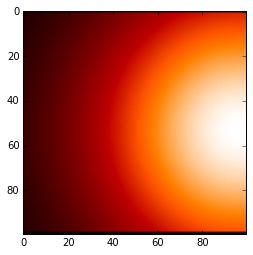

In [63]:
%matplotlib inline
plt.imshow(drum[0],cmap='gist_heat')